** Proactive Resource Allocation for Edge Computing in High-Density Networks**

KAVYA M - e5222044@sret.edu.in
NAVEEN PRASATH J - e5222031@sret.edu.in
MOHANAM K - e5222054@sret.edu.in

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
# Step 1: Upload the file
uploaded = files.upload()


Saving environmentMonitoring.csv to environmentMonitoring.csv


In [ ]:
# Step 2: Load the data
file_name = list(uploaded.keys())[0]
data = pd.read_csv('/content/environmentMonitoring.csv')

In [ ]:

# Display the first few rows of the dataframe
print("Data Head:")
print(data.head())


Data Head:
   frame.time_delta  frame.time_relative  frame.len        ip.src  \
0          0.000000             0.000000        105  10.5.126.151   
1          0.000053             0.000053         72   10.5.126.84   
2          0.000043             0.000096        105  10.5.126.153   
3          0.000020             0.000116         72   10.5.126.84   
4          0.000016             0.000132        105  10.5.126.155   

         ip.dst  tcp.srcport  tcp.dstport   tcp.flags  tcp.time_delta  \
0   10.5.126.84        40629         1883  0x00000018        0.000000   
1  10.5.126.151         1883        40629  0x00000018        0.000053   
2   10.5.126.84        45639         1883  0x00000018        0.000000   
3  10.5.126.153         1883        45639  0x00000018        0.000020   
4   10.5.126.84        45093         1883  0x00000018        0.000000   

   tcp.len  ...  mqtt.qos  mqtt.retain  mqtt.topic  mqtt.topic_len  mqtt.ver  \
0       37  ...       0.0          0.0           0     

In [ ]:
# Step 3: Calculate Throughput, Bandwidth, and Latency
data['Throughput'] = data['tcp.len'] / data['tcp.time_delta']
data['Bandwidth'] = data['tcp.len'] / data['tcp.pdu.size']
data['Latency'] = data['tcp.time_delta'] * data['tcp.pdu.size']

In [ ]:
# Drop rows with infinite or NaN values resulting from division
data = data.replace([float('inf'), -float('inf')], float('nan')).dropna()

In [ ]:
# Step 4: Define the independent and dependent features
# Define independent features
X = data[['tcp.len', 'tcp.time_delta', 'tcp.pdu.size']]

In [ ]:
# Define dependent features
y = data[['Throughput', 'Bandwidth', 'Latency']]

In [ ]:
# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 6: Train a Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Step 7: Make predictions
y_pred = rf_model.predict(X_test)

In [ ]:
# Step 8: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Evaluation Metrics:\nMSE: {mse}\nRMSE: {rmse}\nMAE: {mae}\nR²: {r2}")

Evaluation Metrics:
MSE: 51788.04735059513
RMSE: 227.569873556662
MAE: 2.5018840907396727
R²: 0.9999905318229071


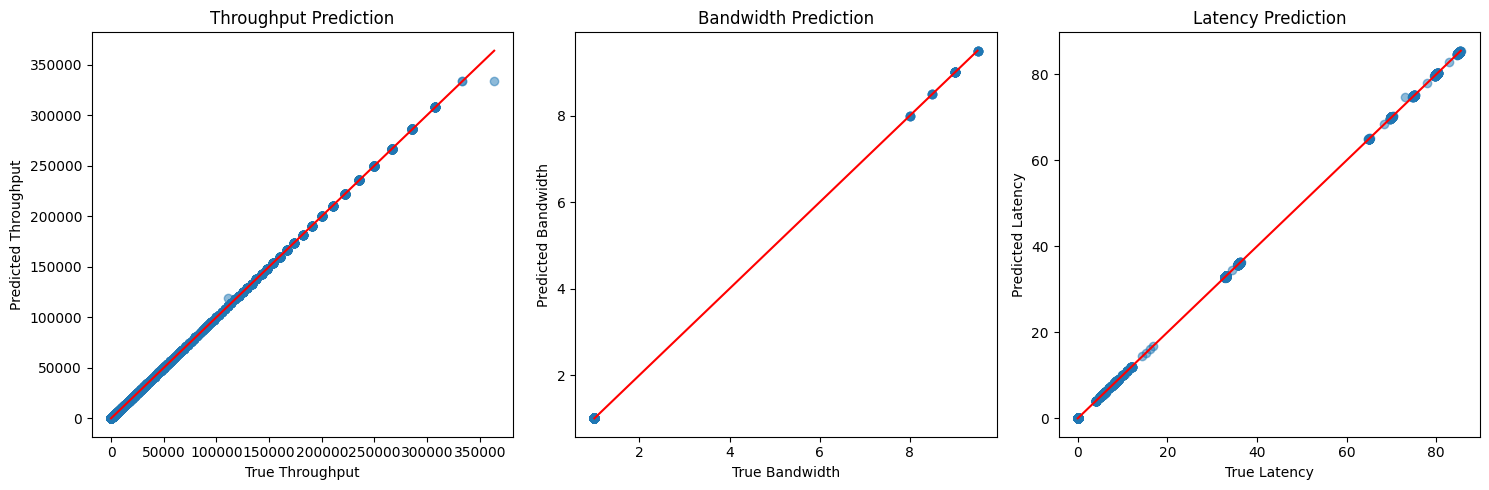

In [ ]:
# Step 9: Plot the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test['Throughput'], y_pred[:, 0], alpha=0.5)
plt.plot([y_test['Throughput'].min(), y_test['Throughput'].max()], [y_test['Throughput'].min(), y_test['Throughput'].max()], color='red')
plt.xlabel('True Throughput')
plt.ylabel('Predicted Throughput')
plt.title('Throughput Prediction')

plt.subplot(1, 3, 2)
plt.scatter(y_test['Bandwidth'], y_pred[:, 1], alpha=0.5)
plt.plot([y_test['Bandwidth'].min(), y_test['Bandwidth'].max()], [y_test['Bandwidth'].min(), y_test['Bandwidth'].max()], color='red')
plt.xlabel('True Bandwidth')
plt.ylabel('Predicted Bandwidth')
plt.title('Bandwidth Prediction')

plt.subplot(1, 3, 3)
plt.scatter(y_test['Latency'], y_pred[:, 2], alpha=0.5)
plt.plot([y_test['Latency'].min(), y_test['Latency'].max()], [y_test['Latency'].min(), y_test['Latency'].max()], color='red')
plt.xlabel('True Latency')
plt.ylabel('Predicted Latency')
plt.title('Latency Prediction')

plt.tight_layout()
plt.show()


**RIDGE REGRESSION**

In [ ]:
# Step 1: Train a Ridge Regression model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)


Ridge()

In [ ]:
# Step 2 (Ridge): Make predictions with Ridge Regression
ridge_pred = ridge_model.predict(X_test)

# Step 8 (Ridge): Evaluate the Ridge model
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

In [ ]:
print("\nRidge Regression Evaluation Metrics:")
print(f"MSE: {ridge_mse}")
print(f"RMSE: {ridge_rmse}")
print(f"MAE: {ridge_mae}")
print(f"R²: {ridge_r2}")



Ridge Regression Evaluation Metrics:
MSE: 1143560900.201531
RMSE: 33816.57729873813
MAE: 14401.55527931769
R²: 0.7699948595699162


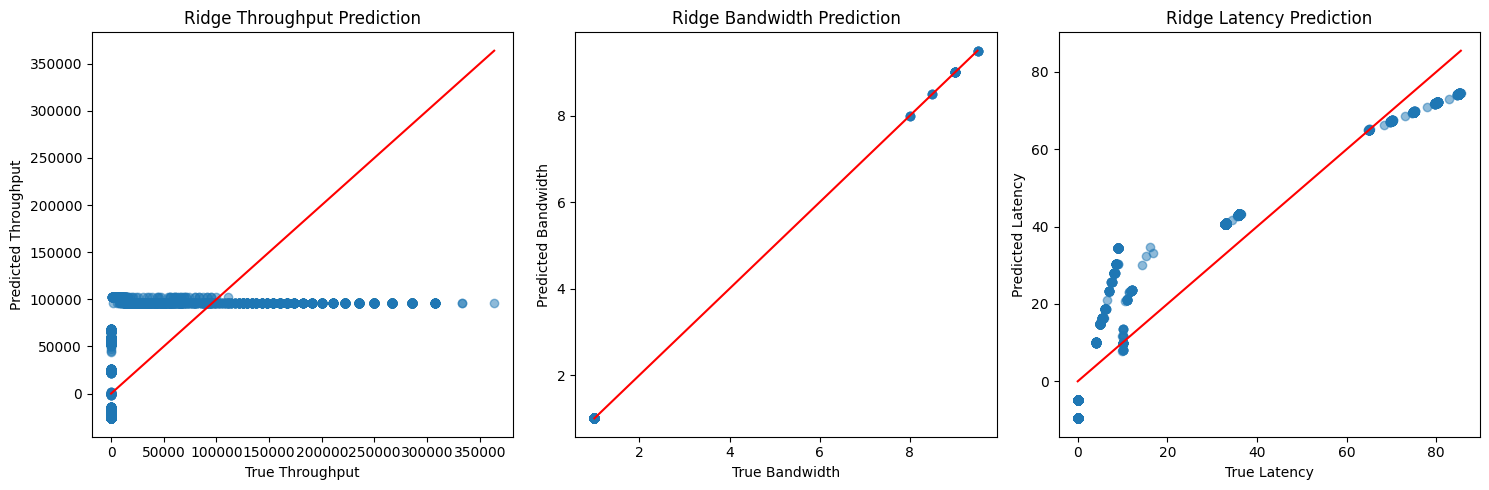

In [ ]:
# Step 3 (Ridge): Plot the Ridge Regression results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test['Throughput'], ridge_pred[:, 0], alpha=0.5)
plt.plot([y_test['Throughput'].min(), y_test['Throughput'].max()], [y_test['Throughput'].min(), y_test['Throughput'].max()], color='red')
plt.xlabel('True Throughput')
plt.ylabel('Predicted Throughput')
plt.title('Ridge Throughput Prediction')

plt.subplot(1, 3, 2)
plt.scatter(y_test['Bandwidth'], ridge_pred[:, 1], alpha=0.5)
plt.plot([y_test['Bandwidth'].min(), y_test['Bandwidth'].max()], [y_test['Bandwidth'].min(), y_test['Bandwidth'].max()], color='red')
plt.xlabel('True Bandwidth')
plt.ylabel('Predicted Bandwidth')
plt.title('Ridge Bandwidth Prediction')

plt.subplot(1, 3, 3)
plt.scatter(y_test['Latency'], ridge_pred[:, 2], alpha=0.5)
plt.plot([y_test['Latency'].min(), y_test['Latency'].max()], [y_test['Latency'].min(), y_test['Latency'].max()], color='red')
plt.xlabel('True Latency')
plt.ylabel('Predicted Latency')
plt.title('Ridge Latency Prediction')

plt.tight_layout()
plt.show()

**LSTM(Long Short-Term Memory)**

In [ ]:
# Step 1: Normalize data for LSTM
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Reshape X for LSTM (LSTM expects input shape: [samples, timesteps, features])
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

In [ ]:
# Step 2: Split normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)



In [ ]:
# Step 3: Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dense(y_train.shape[1]))
lstm_model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Step 4: Train the LSTM model
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0383 - val_loss: 0.0076
Epoch 2/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0070 - val_loss: 0.0057
Epoch 3/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0059 - val_loss: 0.0054
Epoch 4/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0055 - val_loss: 0.0053
Epoch 5/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0053 - val_loss: 0.0053
Epoch 6/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0055 - val_loss: 0.0053
Epoch 7/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0055 - val_loss: 0.0053
Epoch 8/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0056 - val_loss: 0.0054
Epoch 9/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0056 - val_loss: 0.0053
Epoch 10/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0055 - val_loss: 0.0053
Epoch 11/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0055 - val_loss: 0.0053
Epoch 12/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step

In [ ]:
# Step 5: Make predictions with the LSTM model
y_pred_lstm = lstm_model.predict(X_test)

# Inverse transform predictions and true values to original scale
y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm)
y_test_original = scaler_y.inverse_transform(y_test)

199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
# Step 6: Evaluate the LSTM model
lstm_mse = mean_squared_error(y_test_original, y_pred_lstm)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(y_test_original, y_pred_lstm)
lstm_r2 = r2_score(y_test_original, y_pred_lstm)

print("\nLSTM Evaluation Metrics:")
print(f"MSE: {lstm_mse}")
print(f"RMSE: {lstm_rmse}")
print(f"MAE: {lstm_mae}")
print(f"R²: {lstm_r2}")


LSTM Evaluation Metrics:
MSE: 698282717.5328442
RMSE: 26425.039593780068
MAE: 6942.058270746703
R²: 0.8740812438742614


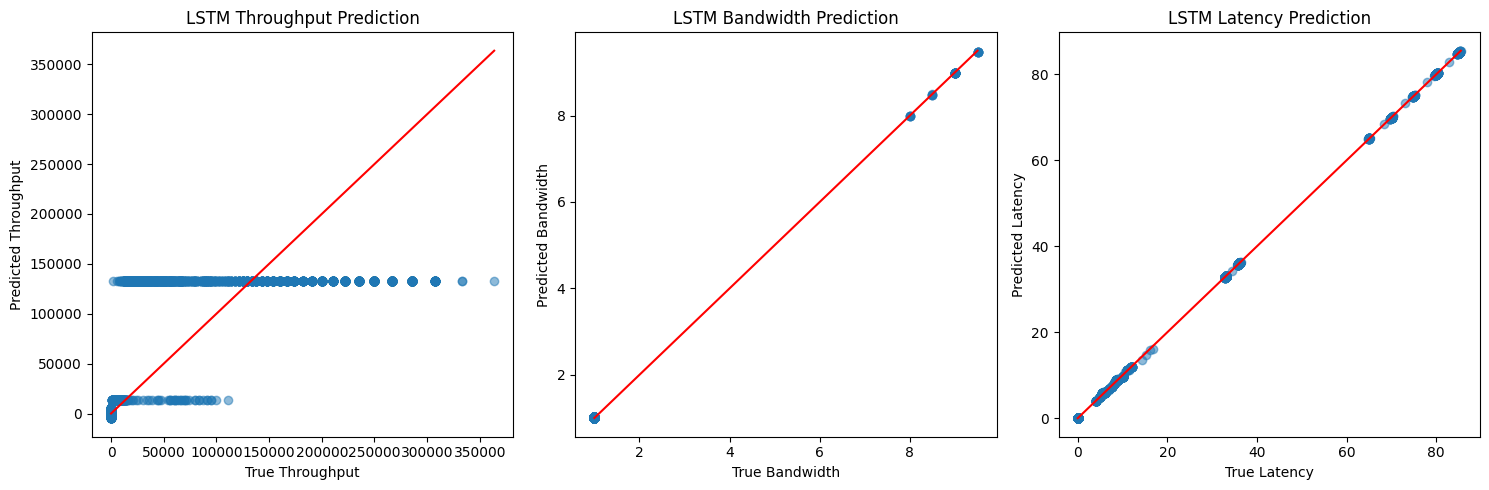

In [ ]:
# Step 12: Plot LSTM results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test_original[:, 0], y_pred_lstm[:, 0], alpha=0.5)
plt.plot([y_test_original[:, 0].min(), y_test_original[:, 0].max()],
         [y_test_original[:, 0].min(), y_test_original[:, 0].max()], color='red')
plt.xlabel('True Throughput')
plt.ylabel('Predicted Throughput')
plt.title('LSTM Throughput Prediction')

plt.subplot(1, 3, 2)
plt.scatter(y_test_original[:, 1], y_pred_lstm[:, 1], alpha=0.5)
plt.plot([y_test_original[:, 1].min(), y_test_original[:, 1].max()],
         [y_test_original[:, 1].min(), y_test_original[:, 1].max()], color='red')
plt.xlabel('True Bandwidth')
plt.ylabel('Predicted Bandwidth')
plt.title('LSTM Bandwidth Prediction')


plt.subplot(1, 3, 3)
plt.scatter(y_test_original[:, 2], y_pred_lstm[:, 2], alpha=0.5)
plt.plot([y_test_original[:, 2].min(), y_test_original[:, 2].max()],
         [y_test_original[:, 2].min(), y_test_original[:, 2].max()], color='red')
plt.xlabel('True Latency')
plt.ylabel('Predicted Latency')
plt.title('LSTM Latency Prediction')


plt.tight_layout()
plt.show()

**CNN(Convolutional Neural Network)**

In [ ]:
# Step 1: Reshape data for CNN
X_cnn = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[2]))

In [ ]:
# Step 2: Split data for CNN
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn, y_scaled, test_size=0.2, random_state=42)

In [ ]:
# Step 3 Build the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(y_train.shape[1]))  # Output layer for regression
cnn_model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 4: Train the CNN model
cnn_model.fit(X_train_cnn, y_train_cnn, epochs=50, batch_size=32, verbose=1, validation_data=(X_test_cnn, y_test_cnn))

Epoch 1/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0173 - val_loss: 0.0054
Epoch 2/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0056 - val_loss: 0.0053
Epoch 3/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0054 - val_loss: 0.0053
Epoch 4/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0054 - val_loss: 0.0055
Epoch 5/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0055 - val_loss: 0.0053
Epoch 6/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0056 - val_loss: 0.0053
Epoch 7/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0056 - val_loss: 0.0053
Epoch 8/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0055 - val_loss: 0.0053
Epoch 9/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0055 - val_loss: 0.0053
Epoch 10/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0056 - val_loss: 0.0053
Epoch 11/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0054 - val_loss: 0.0053
Epoch 12/50
793/793 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

In [ ]:
# Step 5: Make predictions with the CNN model
y_pred_cnn = cnn_model.predict(X_test_cnn)

# Inverse transform predictions and true values to original scale
y_pred_cnn = scaler_y.inverse_transform(y_pred_cnn)
y_test_cnn_original = scaler_y.inverse_transform(y_test_cnn)

199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
# Step 6: Evaluate the CNN model
cnn_mse = mean_squared_error(y_test_cnn_original, y_pred_cnn)
cnn_rmse = np.sqrt(cnn_mse)
cnn_mae = mean_absolute_error(y_test_cnn_original, y_pred_cnn)
cnn_r2 = r2_score(y_test_cnn_original, y_pred_cnn)

print("\nCNN Evaluation Metrics:")
print(f"MSE: {cnn_mse}")
print(f"RMSE: {cnn_rmse}")
print(f"MAE: {cnn_mae}")
print(f"R²: {cnn_r2}")


CNN Evaluation Metrics:
MSE: 695708382.2842649
RMSE: 26376.28446700302
MAE: 6961.079540365737
R²: 0.8745884248952835


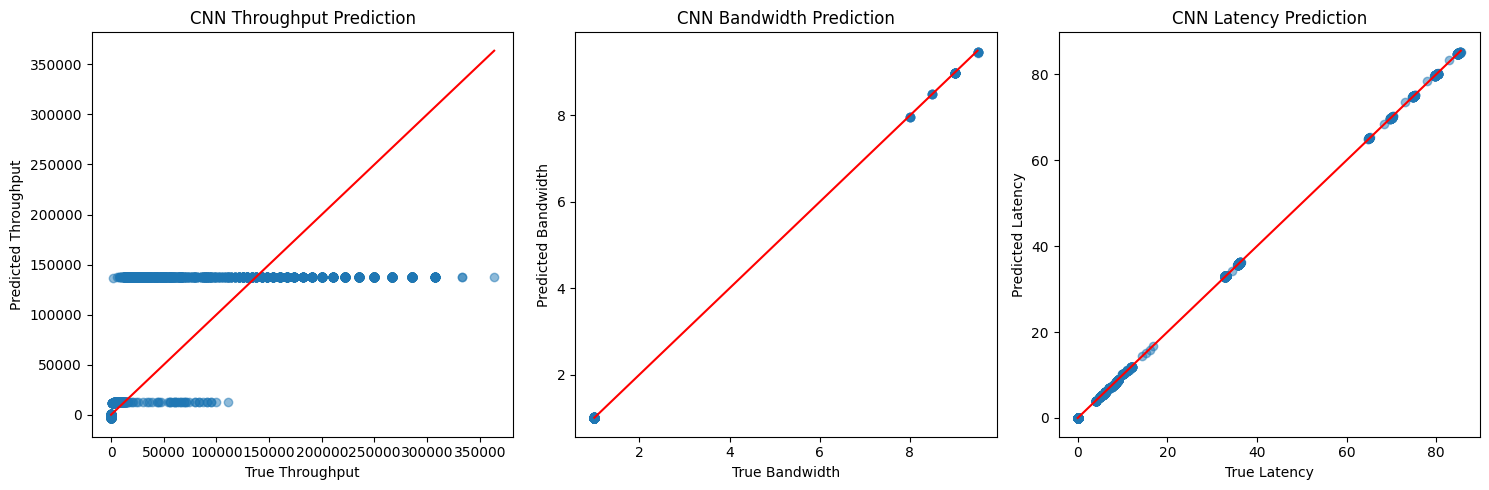

In [ ]:
# Step 7: Plot CNN results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test_cnn_original[:, 0], y_pred_cnn[:, 0], alpha=0.5)
plt.plot([y_test_cnn_original[:, 0].min(), y_test_cnn_original[:, 0].max()],
         [y_test_cnn_original[:, 0].min(), y_test_cnn_original[:, 0].max()], color='red')
plt.xlabel('True Throughput')
plt.ylabel('Predicted Throughput')
plt.title('CNN Throughput Prediction')

plt.subplot(1, 3, 2)
plt.scatter(y_test_cnn_original[:, 1], y_pred_cnn[:, 1], alpha=0.5)
plt.plot([y_test_cnn_original[:, 1].min(), y_test_cnn_original[:, 1].max()],
         [y_test_cnn_original[:, 1].min(), y_test_cnn_original[:, 1].max()], color='red')
plt.xlabel('True Bandwidth')
plt.ylabel('Predicted Bandwidth')
plt.title('CNN Bandwidth Prediction')

plt.subplot(1, 3, 3)
plt.scatter(y_test_cnn_original[:, 2], y_pred_cnn[:, 2], alpha=0.5)
plt.plot([y_test_cnn_original[:, 2].min(), y_test_cnn_original[:, 2].max()],
         [y_test_cnn_original[:, 2].min(), y_test_cnn_original[:, 2].max()], color='red')
plt.xlabel('True Latency')
plt.ylabel('Predicted Latency')
plt.title('CNN Latency Prediction')


plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Dynamic Hill Climbing Prediction Function
def dynamic_hill_climbing_predict(train_data, test_data, max_iterations=100, tolerance=1e-4):
    predictions = []
    train_mean = np.mean(train_data)  # Start with the mean of the training data

    for test_value in test_data:
        current_prediction = train_mean
        best_error = mean_squared_error([test_value], [current_prediction])
        step_size = 0.1 * np.std(train_data)  # Dynamic step size based on training data variability

        for _ in range(max_iterations):
            # Generate a new prediction
            new_prediction = current_prediction + (step_size if np.random.rand() > 0.5 else -step_size)
            new_error = mean_squared_error([test_value], [new_prediction])

            # Update prediction if error improves
            if new_error < best_error:
                best_error = new_error
                current_prediction = new_prediction
            else:
                step_size *= 0.5  # Reduce step size if no improvement

            # Stop if improvement is negligible
            if step_size < tolerance:
                break

        predictions.append(current_prediction)

    return np.array(predictions)

# Apply the improved Hill Climbing algorithm
y_pred_throughput = dynamic_hill_climbing_predict(y_train[:, 0], y_test[:, 0])
y_pred_bandwidth = dynamic_hill_climbing_predict(y_train[:, 1], y_test[:, 1])
y_pred_latency = dynamic_hill_climbing_predict(y_train[:, 2], y_test[:, 2])

# Combine predictions into a single array
y_pred_baseline = np.column_stack((y_pred_throughput, y_pred_bandwidth, y_pred_latency))

# Evaluate the model
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
rmse_baseline = np.sqrt(mse_baseline)
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)

# Print evaluation metrics
print(f"Dynamic Hill Climbing Model Evaluation Metrics:\nMSE: {mse_baseline}\nRMSE: {rmse_baseline}\nMAE: {mae_baseline}\nR²: {r2_baseline}")


Dynamic Hill Climbing Model Evaluation Metrics:
MSE: 0.04478626587174058
RMSE: 0.2116276585698112
MAE: 0.11820873098694142
R²: 0.1784879047822613


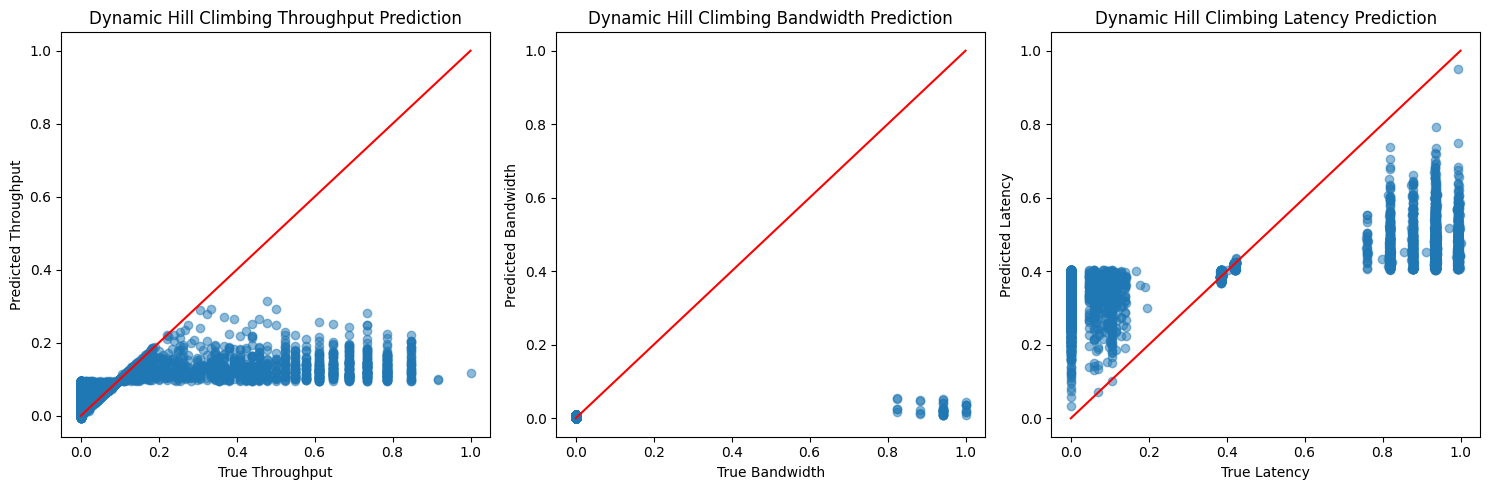

In [ ]:
# Plotting for Dynamic Hill Climbing
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test[:, 0], y_pred_baseline[:, 0], alpha=0.5)
plt.plot([y_test[:, 0].min(), y_test[:, 0].max()], [y_test[:, 0].min(), y_test[:, 0].max()], color='red')
plt.xlabel('True Throughput')
plt.ylabel('Predicted Throughput')
plt.title('Dynamic Hill Climbing Throughput Prediction')

plt.subplot(1, 3, 2)
plt.scatter(y_test[:, 1], y_pred_baseline[:, 1], alpha=0.5)
plt.plot([y_test[:, 1].min(), y_test[:, 1].max()], [y_test[:, 1].min(), y_test[:, 1].max()], color='red')
plt.xlabel('True Bandwidth')
plt.ylabel('Predicted Bandwidth')
plt.title('Dynamic Hill Climbing Bandwidth Prediction')

plt.subplot(1, 3, 3)
plt.scatter(y_test[:, 2], y_pred_baseline[:, 2], alpha=0.5)
plt.plot([y_test[:, 2].min(), y_test[:, 2].max()], [y_test[:, 2].min(), y_test[:, 2].max()], color='red')
plt.xlabel('True Latency')
plt.ylabel('Predicted Latency')
plt.title('Dynamic Hill Climbing Latency Prediction')

plt.tight_layout()
plt.show()

In [ ]:
# Create a new DataFrame for the Dynamic Hill Climbing results
dhc_data = {'Model': ['Dynamic Hill Climbing'],
            'MSE': [mse_baseline],
            'RMSE': [rmse_baseline],
            'MAE': [mae_baseline],
            'R²': [r2_baseline]}

dhc_df = pd.DataFrame(dhc_data)

# Concatenate the existing DataFrame with the new DHC DataFrame
df = pd.concat([df, dhc_df], ignore_index=True)
df

,Model,MSE,RMSE,MAE,R²
0,Random Forest,5.178805e+04,227.569874,2.501884,0.999991
1,Ridge Regression,1.143561e+09,33816.577299,14401.555279,0.769995
2,LSTM,6.982827e+08,26425.039594,6942.058271,0.874081
3,CNN,6.957084e+08,26376.284467,6961.079540,0.874588
4,Dynamic Hill Climbing,4.478627e-02,0.211628,0.118209,0.178488
5,Dynamic Hill Climbing,4.478627e-02,0.211628,0.118209,0.178488
